# Normal distribution 

The simplest model: the Normal distribution. It is used as a basic components in many more complex models.

In [5]:
using Pkg
Pkg.activate("../");

using LinearAlgebra
using Plots
using Random

import ExpFamilyDistributions
const EFD = ExpFamilyDistributions

using Revise
using BayesianModels

# Plotting function
include("plotting.jl");

  Activating environment at `~/Repositories/BayesianModels.jl/Project.toml`


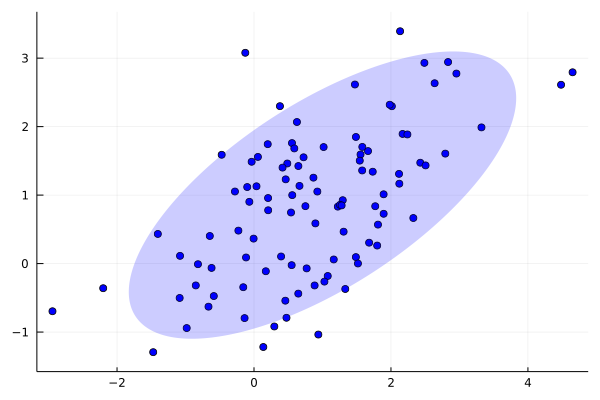

In [29]:
T = Float64
Œº‚Çì = T[1, 1] 
Œ£‚Çì = T[2 1; 1.0  1.1]
#Œ£‚Çì = T[2 0; 0  1.1]

function draw(n, Œº, Œ£)
    L = cholesky(Œ£).L
    hcat([Œº + L*randn(T, 2) for i in 1:n]...)
end

X = draw(100, Œº‚Çì, Œ£‚Çì)
p = plot(legend = false, aspect_ratio = 1)
scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(Œº‚Çì, Œ£‚Çì, œÉ = 2, color = :blue, linewidth = 0, fillalpha = 0.2)

In [77]:
D = 2
model_full = BayesianModels.Normal(D, pstrength = 1)
model_diag = BayesianModels.NormalDiag(D, pstrength = 1)

BayesianModels.NormalDiagIndependentParams{2} (
  (Œº): BayesianModels.BayesianParameter{ExpFamilyDistributions.NormalDiag{2}, ExpFamilyDistributions.NormalDiag{2}, Vector{Float64}}
  (Œª): BayesianModels.BayesianParameter{ExpFamilyDistributions.Gamma{2}, ExpFamilyDistributions.Gamma{2}, Vector{Float64}}
)


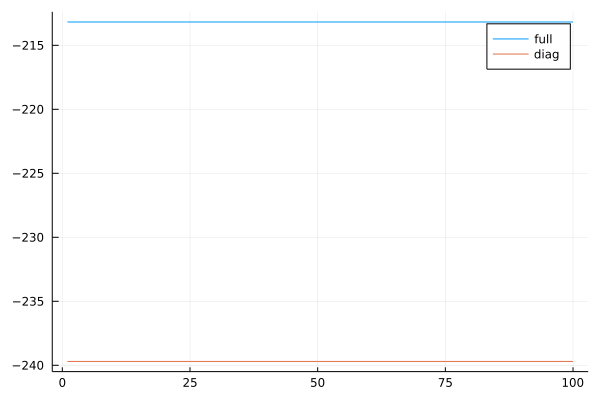

In [79]:
function fit(model, X; lrate = 0.1, steps = 1)
    elbos = []
    params = filter(isbayesianparam, getparams(model))
    cache = Dict()
    for step in 1:steps
        ùìõ = elbo(model, X; cache)
        ‚àáŒæ = ‚àáelbo(model, cache, params)
        gradstep(‚àáŒæ, lrate = lrate)
        push!(elbos, ùìõ)
    end
    elbos
end
steps = 100
elbos_full = fit(model_full, X, steps = steps)
elbos_diag = fit(model_diag, X, steps = steps)
plot(elbos_full, label = "full")
plot!(elbos_diag, label = "diag")

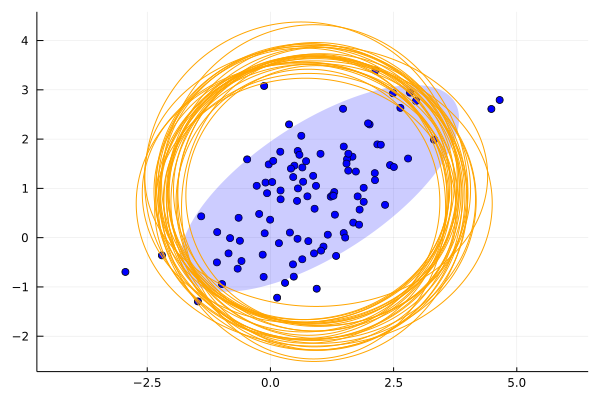

In [80]:
p = plot(legend = false, aspect_ratio = 1)
scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(Œº‚Çì, Œ£‚Çì, œÉ = 2, color = :blue, linecolor = :blue, linewidth = 0, fillalpha = 0.2)

Œºs = EFD.sample(model_diag.Œº.posterior, 30)
Œª = EFD.sample(model_diag.Œª.posterior, 30)
Œ£s = [diagm(1 ./ Œª·µ¢) for Œª·µ¢ in eachcol(Œª)]
for (Œº, Œ£) in zip(eachcol(Œºs), Œ£s)
    plotnormal!(Œº, Œ£, œÉ = 2, color = :orange, linecolor = :orange, fillalpha = 0)
end

p

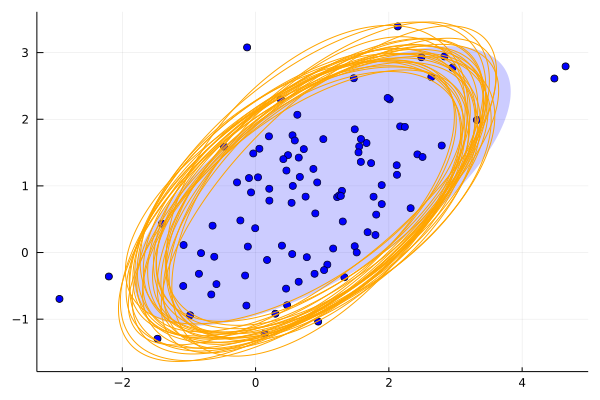

In [81]:
p = plot(legend = false, aspect_ratio = 1)
scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(Œº‚Çì, Œ£‚Çì, œÉ = 2, color = :blue, linecolor = :blue, linewidth = 0, fillalpha = 0.2)

Œºs = EFD.sample(model_full.Œº.posterior, 30)
Œõs = EFD.sample(model_full.Œõ.posterior, 30)
Œ£s = [inv(Œõs[:, :, i]) for i in 1:size(Œõs, 3)]
for (Œº, Œ£) in zip(eachcol(Œºs), Œ£s)
    plotnormal!(Œº, Œ£, œÉ = 2, color = :orange, linecolor = :orange, fillalpha = 0)
end

p

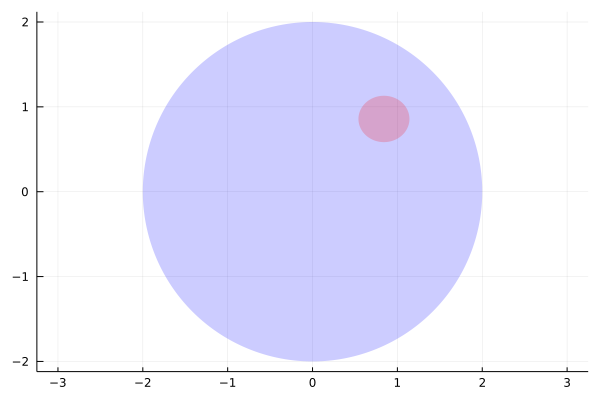

In [82]:
p = plot(legend = false, aspect_ratio = 1)
#scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(model_diag.Œº.prior.Œº, model_diag.Œº.prior.Œ£, œÉ = 2, color = :blue, linecolor = :blue, linewidth = 0, fillalpha = 0.2)
plotnormal!(model_diag.Œº.posterior.Œº, model_diag.Œº.posterior.Œ£, œÉ = 2, color = :red, linecolor = :red, linewidth = 0, fillalpha = 0.2)

p

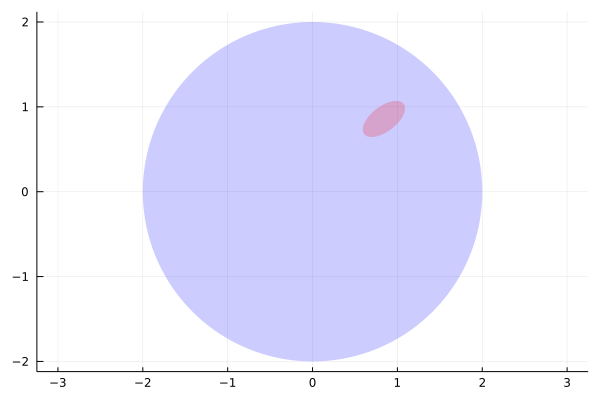

In [83]:
p = plot(legend = false, aspect_ratio = 1)
#scatter!(X[1,:], X[2,:], color = :blue)
plotnormal!(model_full.Œº.prior.Œº, model_full.Œº.prior.Œ£, œÉ = 2, color = :blue, linecolor = :blue, linewidth = 0, fillalpha = 0.2)
plotnormal!(model_full.Œº.posterior.Œº, model_full.Œº.posterior.Œ£, œÉ = 2, color = :red, linecolor = :red, linewidth = 0, fillalpha = 0.2)

p